In [1]:
# Import modules and define simulation params
from cycler import cycler;
import matplotlib.pyplot as plt;
import matplotlib.ticker as mtick
import numpy as np;
from scipy import optimize;
from scipy.constants import c;
import scipy.interpolate as interp;
import sys;
sys.path.insert(0, "../../python")
import time;

# My modules
import horizontal_resolution as hr;

# Colors for plotting.
plot_colors = ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', \
               '#DDCC77','#CC6677', '#882255',  '#AA4499'];
cy = cycler('color', plot_colors);

# Bunch parameters
Q_drive    = 1.5e-9;
sigz_drive = 5.2e-6;
sigt_drive = sigz_drive/c;
Q_wit      = 0.5e-9;
sigz_wit   = 5.2e-6;
sigt_wit   = sigz_wit/c;
del_z      = 175e-6;
del_t      = del_z/c;
x_drive    = 1.0e-3;
y_drive    = 0.0;
x_wit      = 1.0e-3;
y_wit      = 0.0;


drive      = {'Q':Q_drive, 'sig_t':sigt_drive, 'x' : x_drive, 'y' : y_drive};
wit        = {'Q':Q_wit, 'sig_t':sigt_wit, 'x' : x_wit, 'y' : y_wit};

# Crystal parameters (type and thickness)
ctype = 'GaP';
d   = 100e-6;
# Probe parameters
y0      = 800e-9;
a_laser = 0 * np.pi / 180;
z_match = 0;
tau     = np.linspace(-200, 800, 5000) * 1e-15;
probe = {'y0'     :y0, 
         'a_laser': a_laser, 
         'z_match': z_match, 
         'chirp'  : True,
         'width'  : 27e-9};

# time array for THz field
N         = 8000;
dt        = drive['sig_t']/10;
t         = np.linspace(- N * dt/2, N * dt/2, N);

# Compuatational parameters
nslice = int(d * 1e6);


# Simulation parameters

base_params  = {'ctype'   : ctype, 
                't'       : t, 
                'tau'     : tau,
                'd'       : d,
                'beam1'   : drive,
                'beam2'   : wit,
                'nslice'  : nslice,
                't_off'   : del_t,
                'plot'    : False,
                'verbose' : False, 
                'save'    : False,
                'pockel'  : True, 
                'ref'     : True,
                'probe'   : probe};
x_interp = np.arange(-100, 101, 1) * 1e-6; # Offset array

# path for loading files (desktop)
lpath = "/home/keenan/eos_bpm/khuntstone/transverse_resolution/horizontal_signal/"
# (windows)
#lpath = r'C:\\Users\\khunt\\Documents\\Github\\eos_bpm\\khuntstone\\transverse_resolution\\horizontal_signal\\'
# Array of crystal offsets from beamline (in mm) for naming
r_crys = [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, \
          3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0];
# file names for loading
lnames  = [str(i) + "mm_crystal_offset.npy" for i in r_crys];
x_plots = np.array([-100, -50, 0, 50, 100]) * 1e-6; # offsets to plot
# x array for creating interpolation function
x_off    = np.linspace(-100, 100, 20) * 1e-6;
# For plotting
x_plot = np.array([-100, -50, 0, 50, 100]) * 1e-6;

3.0


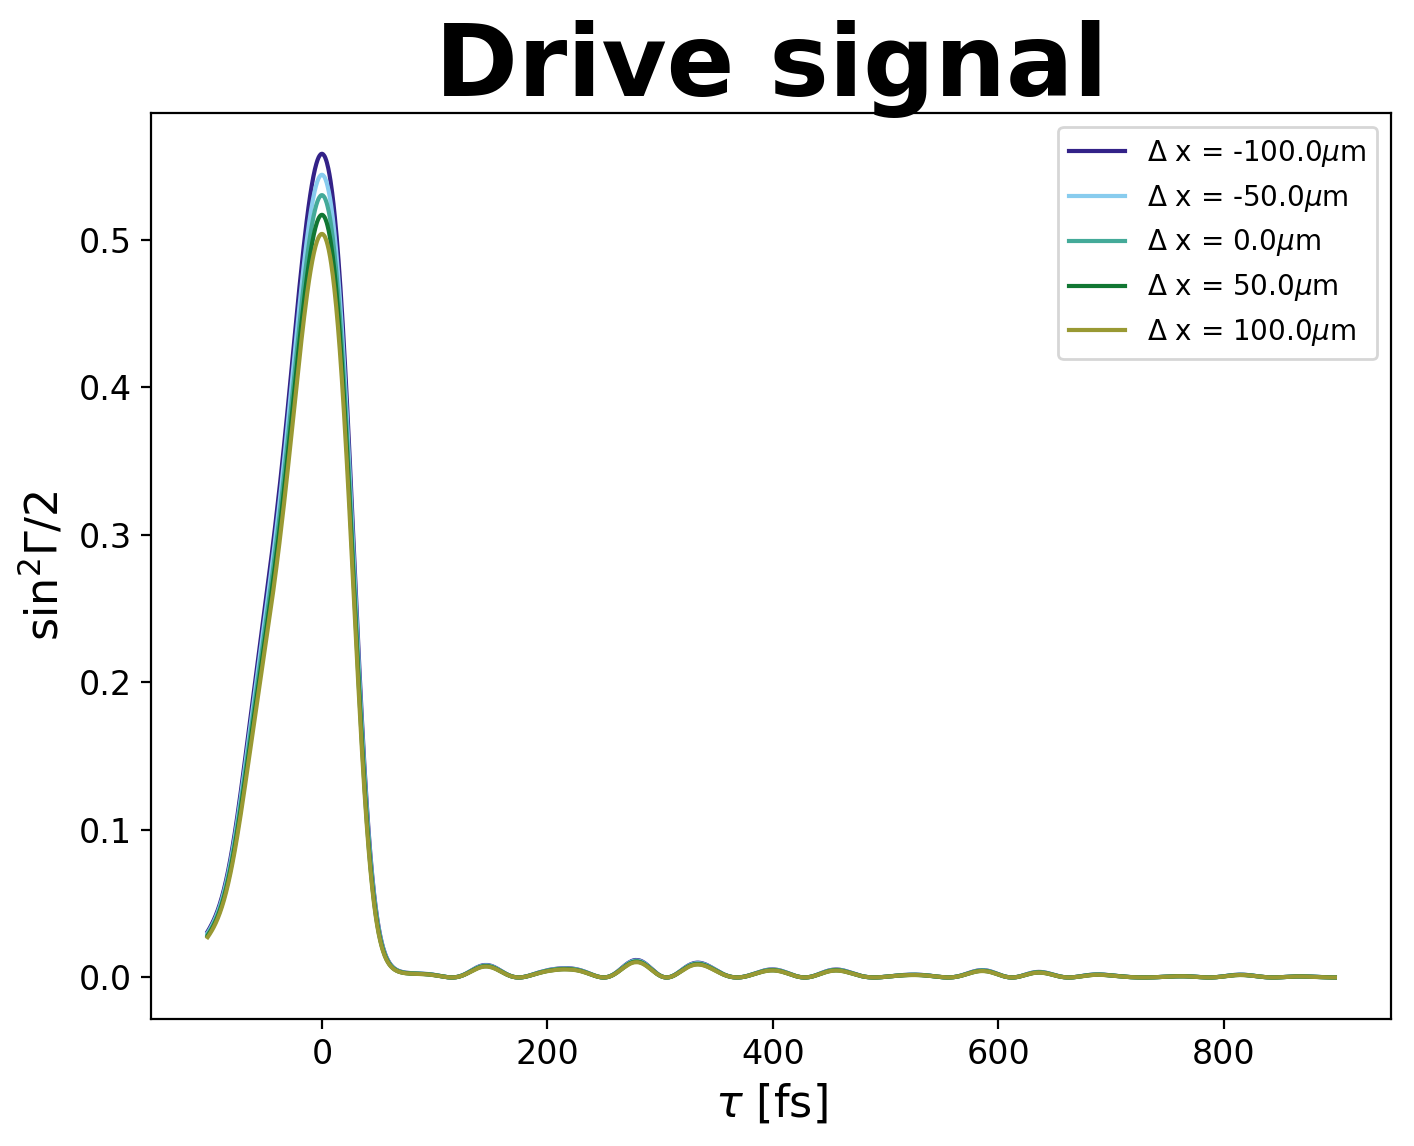

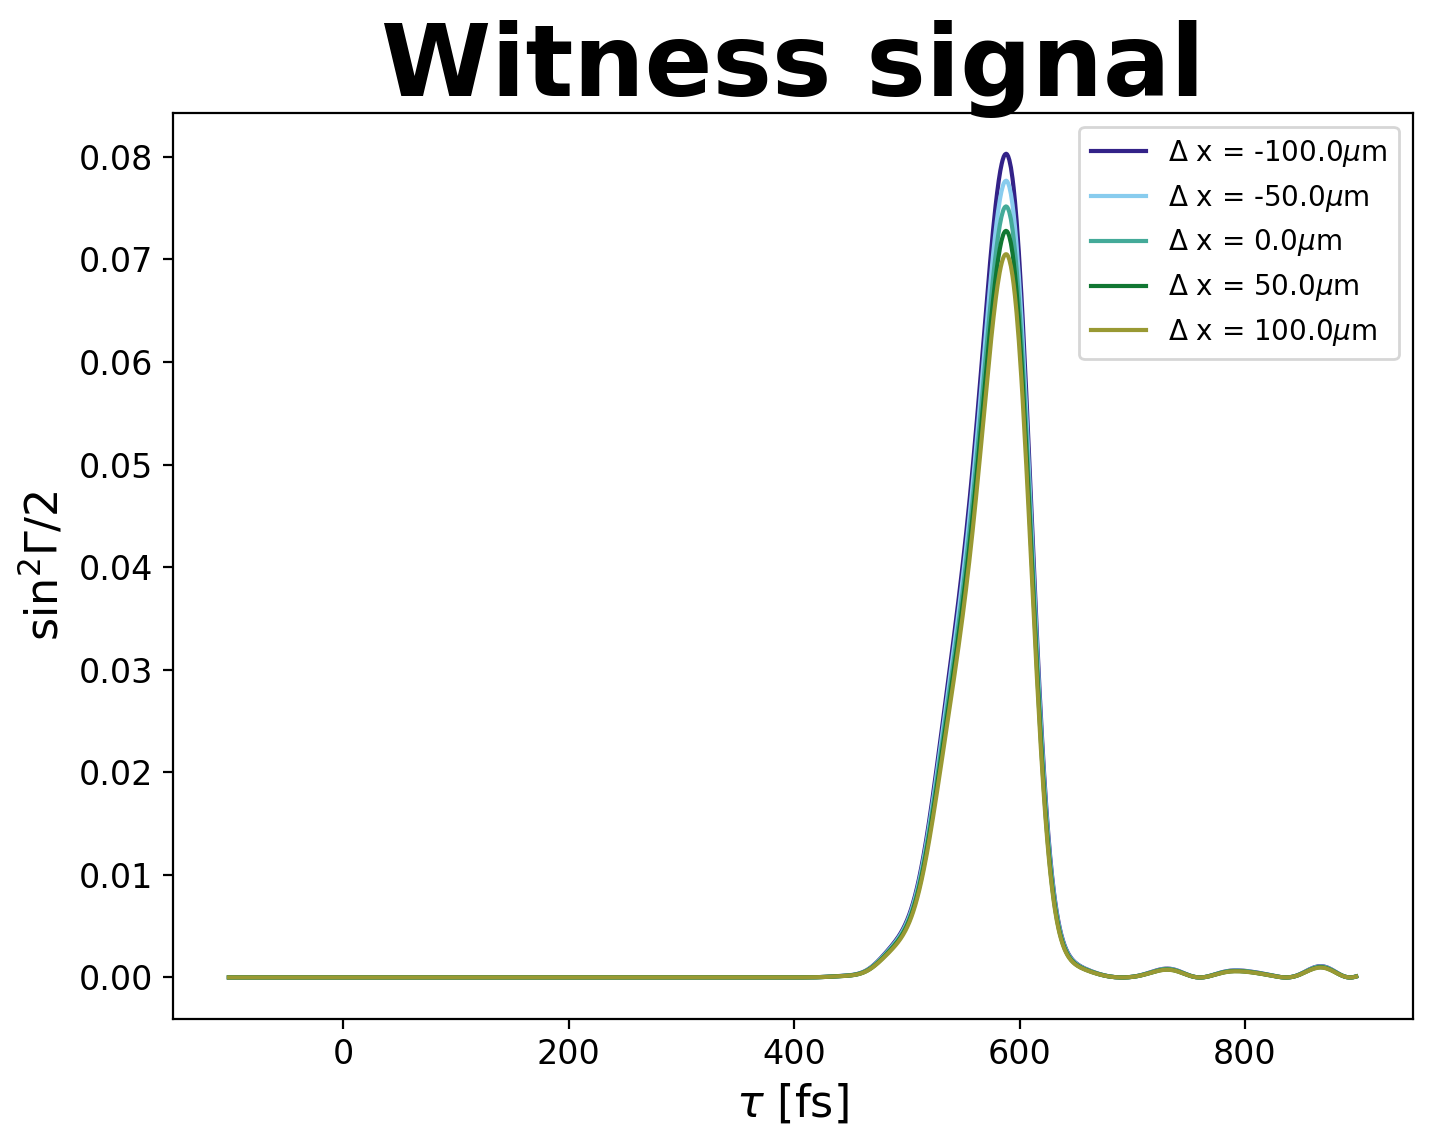

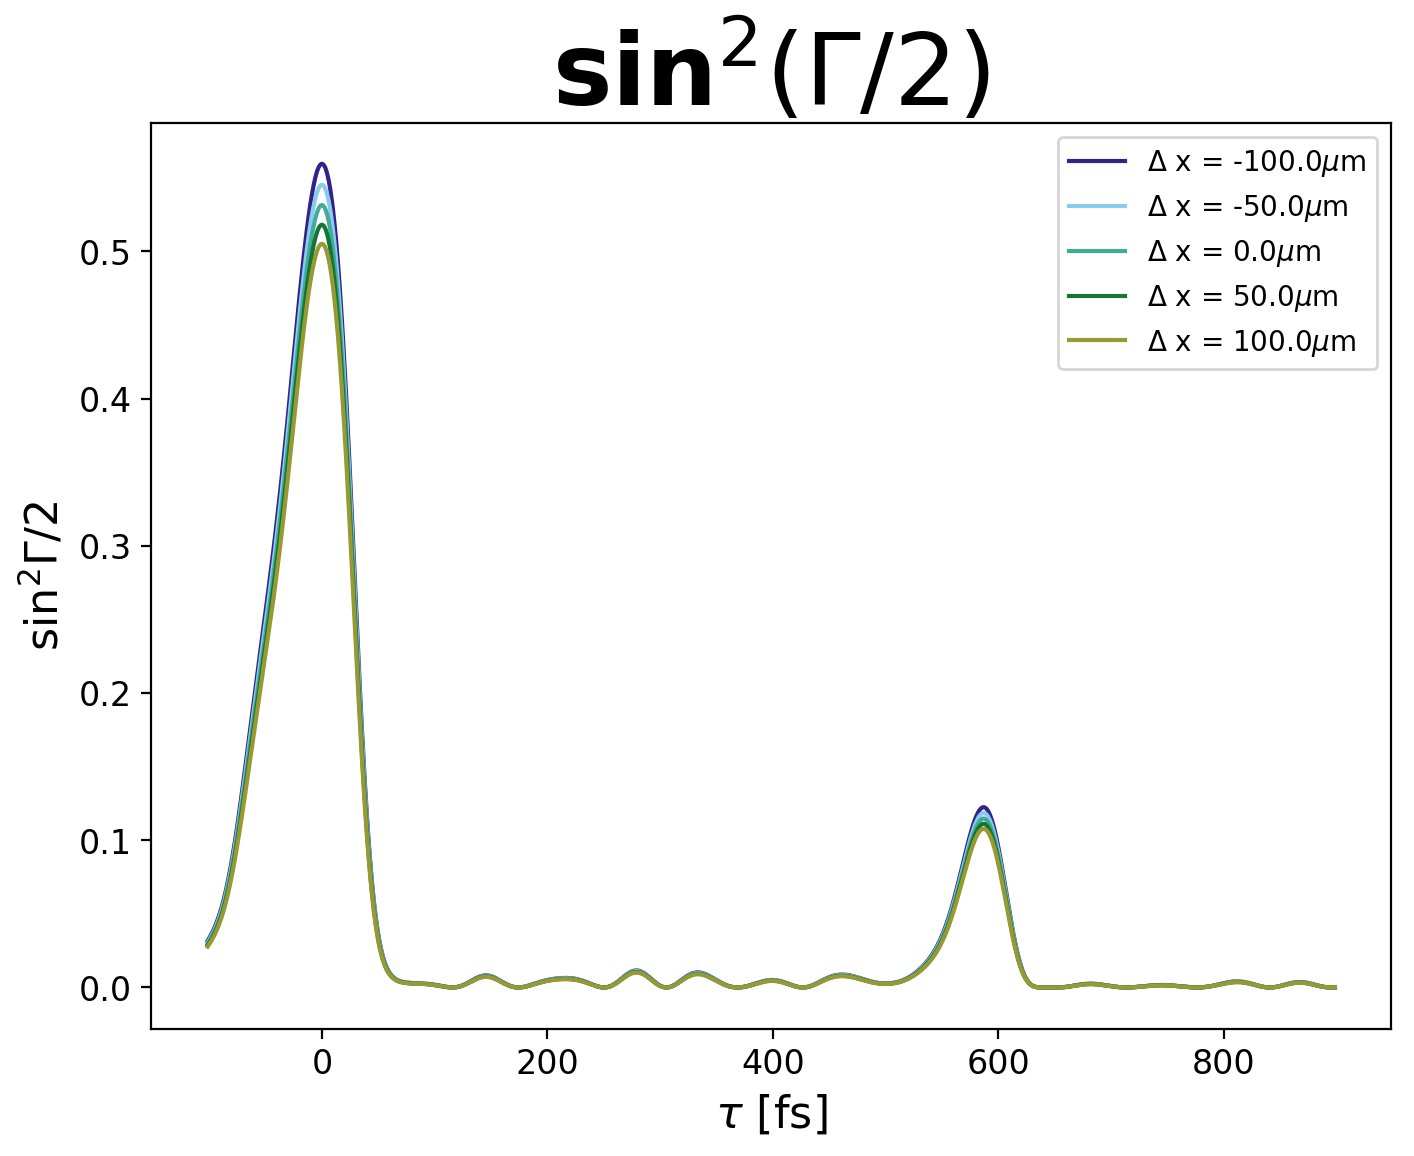

In [5]:
ind = 10;
print(r_crys[ind]);
(drive_sigs, wit_sigs, t_sigs) = np.load(lpath + lnames[ind]);
hr.plot_sigs(drive_sigs, wit_sigs, x_off, t_sigs, x_plot, r_crys[ind], 'cross')

1.0


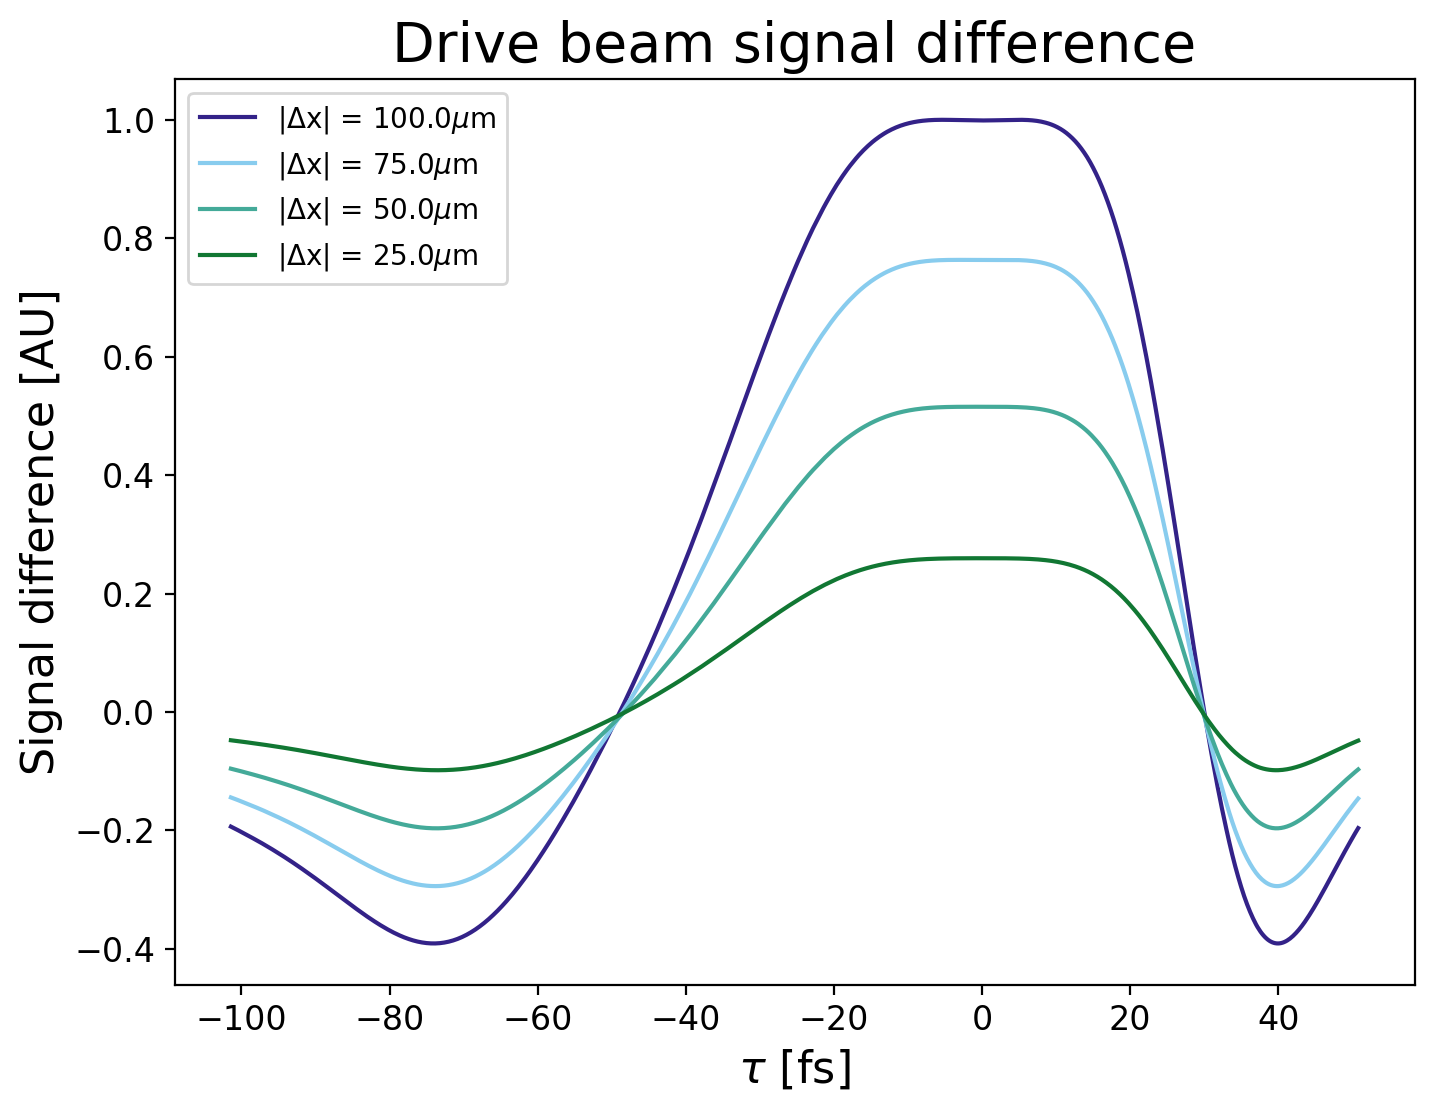

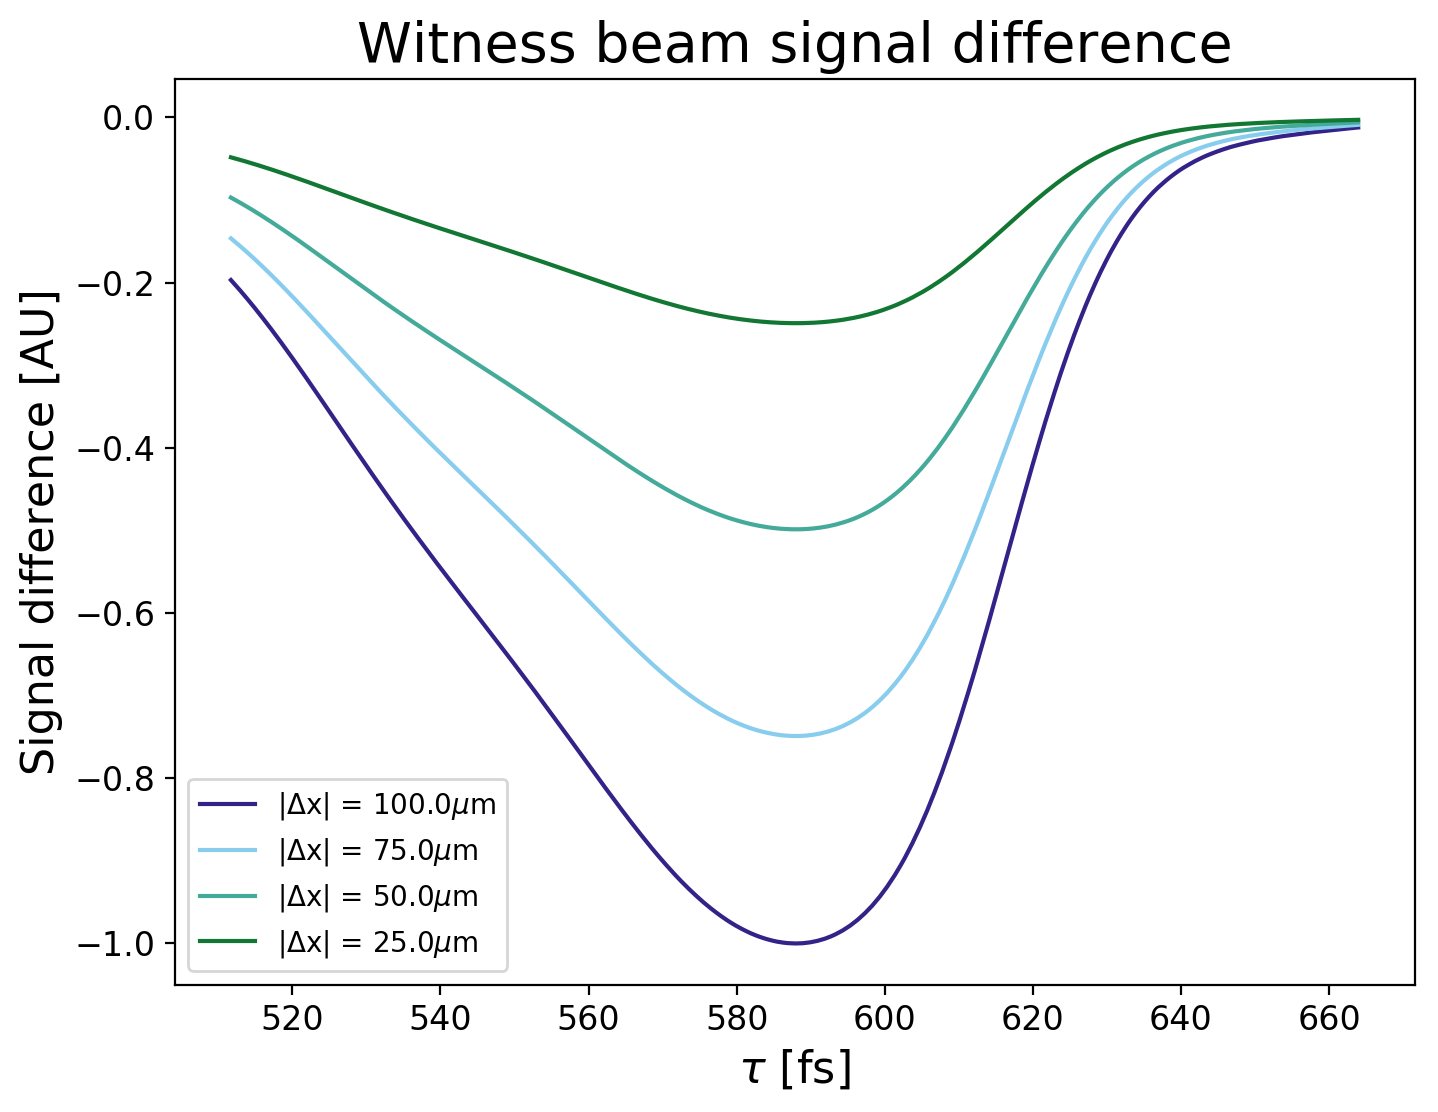

In [3]:
ind = 2;
print(r_crys[ind]);
(drive_sigs, wit_sigs, tsigs) = np.load(lpath + lnames[ind]);
hr.plot_difference(drive_sigs, wit_sigs, x_off, tsigs, x_interp, 'cross'); # Difference is right - left crystal
